In [1]:
!pip install emot

     ---------------------------------------- 61.5/61.5 kB 1.1 MB/s eta 0:00:00


In [2]:
!pip -q install evaluate

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

In [5]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajiv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
df=pd.read_csv("train.csv")

In [7]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
df1=pd.read_csv("test.csv")

In [10]:
df1.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [11]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [13]:
df.shape

(7613, 5)

In [12]:
df1.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [14]:
df1.shape

(3263, 4)

In [17]:
from emot.emo_unicode import UNICODE_EMOJI # For emojis
from emot.emo_unicode import EMOTICONS_EMO

In [18]:
#converting emojis
def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
    return text

In [19]:
df["text"] = df["text"].apply(convert_emojis)
df1["text"] = df1["text"].apply(convert_emojis)

In [20]:
df['text'].head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [23]:
from bs4 import BeautifulSoup

In [24]:
#removing html code
def remove_html(text):
    soup = BeautifulSoup(text)
    text = soup.get_text()
    return text

In [25]:
df["text"] = df["text"].apply(remove_html)
df1["text"] = df1["text"].apply(remove_html)

C:\Users\rajiv\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [26]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [27]:
import string

In [28]:
#converting capital letters
df["text"] = df["text"].str.lower()
df1["text"] = df1["text"].str.lower()
df

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @thetawniest the out of control w...,1
7610,10871,NaN,NaN,m1.94 [01:04 utc]?5km s of volcano hawaii. htt...,1
7611,10872,NaN,NaN,police investigating after an e-bike collided ...,1


In [29]:
#removing urls
def remove_urls(text):
    pattern = re.compile(r'https?://(www\.)?(\w+)(\.\w+)(/\w*)?')
    text = re.sub(pattern, "", text)
    return text


In [30]:
df["text"] = df["text"].apply(remove_urls)
df1["text"] = df1["text"].apply(remove_urls)
df

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @thetawniest the out of control w...,1
7610,10871,NaN,NaN,m1.94 [01:04 utc]?5km s of volcano hawaii.,1
7611,10872,NaN,NaN,police investigating after an e-bike collided ...,1


In [31]:
#removing mentions tagging
def remove_mentions(text):
    pattern = re.compile(r"@\w+")
    text = re.sub(pattern, "", text)
    return text

In [32]:
df["text"] = df["text"].apply(remove_mentions)
df1["text"] = df1["text"].apply(remove_mentions)
df

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,the out of control wild fires in california ...,1
7610,10871,NaN,NaN,m1.94 [01:04 utc]?5km s of volcano hawaii.,1
7611,10872,NaN,NaN,police investigating after an e-bike collided ...,1


In [33]:
#removing unicode chars
def remove_unicode_chars(text):
    text = text.encode("ascii", "ignore").decode()
    return text

In [34]:
df["text"] = df["text"].apply(remove_unicode_chars)
df1["text"] = df1["text"].apply(remove_unicode_chars)
df

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,the out of control wild fires in california ...,1
7610,10871,NaN,NaN,m1.94 [01:04 utc]?5km s of volcano hawaii.,1
7611,10872,NaN,NaN,police investigating after an e-bike collided ...,1


In [35]:
#removing punctuations
string.punctuation
def remove_punctuations(text):
    text = re.sub('[%s]' % re.escape(string.punctuation), " ",text)
    return text

In [36]:
df["text"] = df["text"].apply(remove_punctuations)
df1["text"] = df1["text"].apply(remove_punctuations)
df

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake m...,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all residents asked to shelter in place are ...,1
3,6,NaN,NaN,13 000 people receive wildfires evacuation or...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,the out of control wild fires in california ...,1
7610,10871,NaN,NaN,m1 94 01 04 utc 5km s of volcano hawaii,1
7611,10872,NaN,NaN,police investigating after an e bike collided ...,1


In [37]:
#removing extra spaces
def remove_extra_spaces(text):
    text = re.sub(' +', ' ', text).strip()
    return text

In [38]:
df["text"] = df["text"].apply(remove_extra_spaces)
df1["text"] = df1["text"].apply(remove_extra_spaces)
df

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all residents asked to shelter in place are be...,1
3,6,NaN,NaN,13 000 people receive wildfires evacuation ord...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,the out of control wild fires in california ev...,1
7610,10871,NaN,NaN,m1 94 01 04 utc 5km s of volcano hawaii,1
7611,10872,NaN,NaN,police investigating after an e bike collided ...,1


In [40]:
 from nltk.corpus import stopwords

In [41]:
#removing stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

In [42]:
df["text"] = df["text"].apply(remove_stopwords)
df1["text"] = df1["text"].apply(remove_stopwords)
df

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,13 000 people receive wildfires evacuation ord...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant cranes holding bridge collapse nearb...,1
7609,10870,NaN,NaN,control wild fires california even northern pa...,1
7610,10871,NaN,NaN,m1 94 01 04 utc 5km volcano hawaii,1
7611,10872,NaN,NaN,police investigating e bike collided car littl...,1


In [43]:
df_train = pd.DataFrame(df['text'])
df_train['target'] = df['target']

In [44]:
df_train = pd.DataFrame(df['text'])
df_train['target'] = df['target']

In [45]:
df_test = pd.DataFrame(df1['text'])

In [46]:
df_train.head()

,text,target
0,deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,residents asked shelter place notified officer...,1
3,13 000 people receive wildfires evacuation ord...,1
4,got sent photo ruby alaska smoke wildfires pou...,1


# visualiation

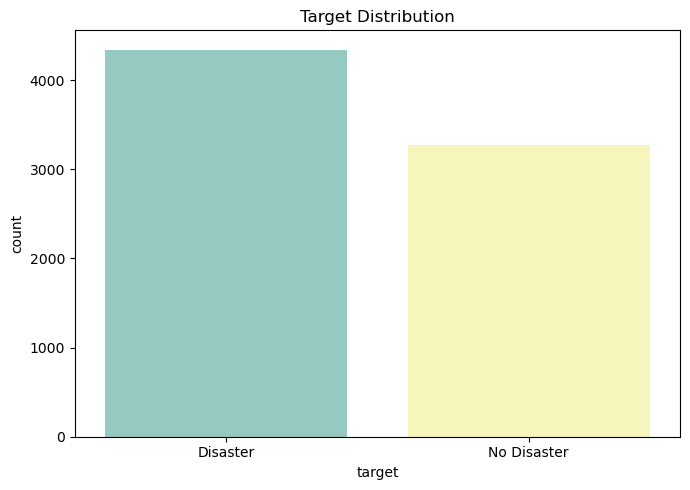

In [47]:
plt.figure(figsize=(7,5))
sns.countplot(x='target',  data=df_train, palette="Set3")
plt.xticks(ticks=np.arange(2), labels=['Disaster','No Disaster'])
plt.title(f"Target Distribution")

plt.tight_layout()

In [53]:
#plotting true and false disater tweet max used word using wordcloud

In [48]:
pos_data = df_train[df_train['target'] == 1]['text']
neg_data = df_train[df_train['target'] == 0]['text']

In [50]:
from wordcloud import WordCloud

In [51]:
wc_pos = WordCloud(max_words=250, width=1000, height=1000, background_color='white').generate(''.join(pos_data))
wc_neg = WordCloud(max_words=250, width=1000, height=1000, background_color='white').generate(''.join(neg_data))

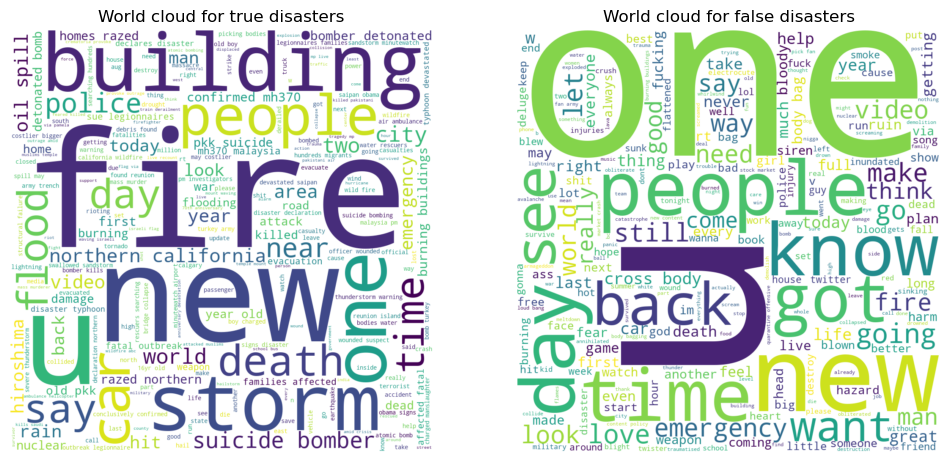

In [52]:
fig, (fig1, fig2) = plt.subplots(1,2, figsize=(12, 12))

fig1.imshow(wc_pos, interpolation='bilinear')
fig1.set_title('World cloud for true disasters')
fig1.axis('off')

fig2.imshow(wc_neg, interpolation='bilinear')
fig2.set_title('World cloud for false disasters')
fig2.axis('off')

plt.show()

<AxesSubplot:xlabel='len', ylabel='Count'>

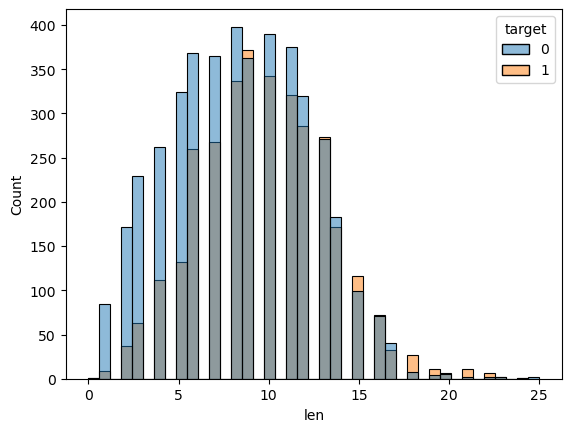

In [54]:
#difference in length between disaster reviews and not

df_train['len']=df_train['text'].str.split().map(lambda x: len(x))

sns.histplot(data=df_train, x='len', hue="target")

In [55]:
len(df_train['text'].max())

19

# tokenization

In [57]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [58]:
token = Tokenizer()
token.fit_on_texts(df_train['text'])
token.fit_on_texts(df_test['text'])

In [59]:
seq = token.texts_to_sequences(df_train['text'])
seq_test = token.texts_to_sequences(df_test['text'])

In [61]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [62]:
# pad the document

max_length = 50
pad_seq = pad_sequences(seq, maxlen=max_length, padding='post')
pad_seq_test = pad_sequences(seq_test, maxlen=max_length, padding='post')

In [65]:
from tqdm import tqdm

In [68]:
embedding_vector = {}
vocab_size = len(token.word_index) +1

f = open('glove.6B.50d.txt', encoding='utf-8')
 
for line in tqdm(f):
  value = line.split(' ')
  word = value[0]
  coef = np.array(value[1:], dtype = 'float32')
  embedding_vector[word] = coef

400000it [00:06, 62834.22it/s]


In [69]:
embedding_matrix = np.zeros((vocab_size, 50))
for word,i in tqdm(token.word_index.items()):
    embedding_value = embedding_vector.get(word)
    if embedding_value is not None:
        embedding_matrix[i] = embedding_value

100%|████████████████████████████████████████████████████████████████████████| 18026/18026 [00:00<00:00, 194351.75it/s]


In [71]:
from tensorflow.keras.utils import to_categorical

In [72]:
y_train = to_categorical(df_train['target'])

In [73]:
embedding_matrix.shape

(18027, 50)

In [74]:
from tensorflow.keras.models import Sequential

In [76]:
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Dropout

In [78]:
from tensorflow.keras import regularizers

In [85]:
#creating the model and adding some layers

In [79]:
model = Sequential()
model.add(Embedding(vocab_size,50, weights = [embedding_matrix], input_length=max_length, trainable=True))
model.add(Bidirectional(LSTM(25, dropout=0.1)))
model.add(Dense(25, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.1))
model.add(Dense(12, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.1))
model.add(Dense(2,activation = 'sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 50)            901350    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 50)                15200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dropout (Dropout)            (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                312       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                

In [81]:
import tensorflow as tf

In [82]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.3, 
                                                 patience=2, verbose=1, min_lr=1e-7)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [ ]:
#compiling the model

In [83]:
model.compile(
    optimizer = optimizer,
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics = [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
               tf.keras.metrics.Precision(name='precision'),
               tf.keras.metrics.Recall(name='recall')]
)

In [84]:
history = model.fit(
    pad_seq, y_train, 
    batch_size = 32,
    epochs = 50,
    validation_split = 0.3,
    
    callbacks = [reduce_lr]
)

Epoch 1/50


C:\Users\rajiv\anaconda3\lib\site-packages\keras\backend.py:4993: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


167/167 [==============================] - 13s 43ms/step - loss: 1.0244 - accuracy: 0.5306 - precision: 0.5460 - recall: 0.3629 - val_loss: 0.9877 - val_accuracy: 0.5731 - val_precision: 0.5742 - val_recall: 0.5657
Epoch 2/50
167/167 [==============================] - 7s 40ms/step - loss: 0.9437 - accuracy: 0.5985 - precision: 0.6005 - recall: 0.5889 - val_loss: 0.8837 - val_accuracy: 0.6430 - val_precision: 0.6402 - val_recall: 0.6528
Epoch 3/50
167/167 [==============================] - 7s 41ms/step - loss: 0.8366 - accuracy: 0.7085 - precision: 0.7035 - recall: 0.7208 - val_loss: 0.7999 - val_accuracy: 0.7644 - val_precision: 0.7577 - val_recall: 0.7776
Epoch 4/50
167/167 [==============================] - 7s 40ms/step - loss: 0.7675 - accuracy: 0.7666 - precision: 0.7602 - recall: 0.7788 - val_loss: 0.7462 - val_accuracy: 0.7684 - val_precision: 0.7645 - val_recall: 0.7758
Epoch 5/50
167/167 [==============================] - 7s 41ms/step - loss: 0.7102 - accuracy: 0.7750 - precisi

167/167 [==============================] - 7s 41ms/step - loss: 0.3682 - accuracy: 0.8782 - precision: 0.8764 - recall: 0.8807 - val_loss: 0.5059 - val_accuracy: 0.8004 - val_precision: 0.7993 - val_recall: 0.8021
Epoch 36/50
167/167 [==============================] - 7s 40ms/step - loss: 0.3755 - accuracy: 0.8763 - precision: 0.8749 - recall: 0.8782 - val_loss: 0.5059 - val_accuracy: 0.8004 - val_precision: 0.7993 - val_recall: 0.8021
Epoch 37/50
167/167 [==============================] - 7s 41ms/step - loss: 0.3784 - accuracy: 0.8764 - precision: 0.8759 - recall: 0.8771 - val_loss: 0.5059 - val_accuracy: 0.8004 - val_precision: 0.7993 - val_recall: 0.8021
Epoch 38/50
167/167 [==============================] - 7s 40ms/step - loss: 0.3766 - accuracy: 0.8763 - precision: 0.8751 - recall: 0.8780 - val_loss: 0.5059 - val_accuracy: 0.8004 - val_precision: 0.7993 - val_recall: 0.8021
Epoch 39/50
167/167 [==============================] - 7s 42ms/step - loss: 0.3714 - accuracy: 0.8781 - prec

# Predict the testing data

In [86]:
y_pred = model.predict(pad_seq_test)

In [87]:
y_pred_1 = np.argmax(y_pred, axis=1)

In [90]:
ids=df1["id"]

In [92]:
submission = pd.DataFrame({"id":ids, "target":y_pred_1})
submission.to_csv("submission.csv", index=False)

In [93]:
submission.shape

(3263, 2)